In [2]:
import pickle
import matplotlib.pyplot as plt
import wfdb

In [3]:
# Load the ECG signal for patient a01
base_dir = '/home/explorer/PDC/jisulee/PhysioNet/data/'
signal, fields = wfdb.rdsamp(base_dir + 'a01', channels=[0])

In [4]:
# Load the processed R-peak positions
save_dir = '/home/explorer/PDC/jisulee/PhysioNet/result/2. training/1. preprocessing/r peak/'
with open(save_dir + 'a01.pkl', 'rb') as f:
    rpeaks_data = pickle.load(f)

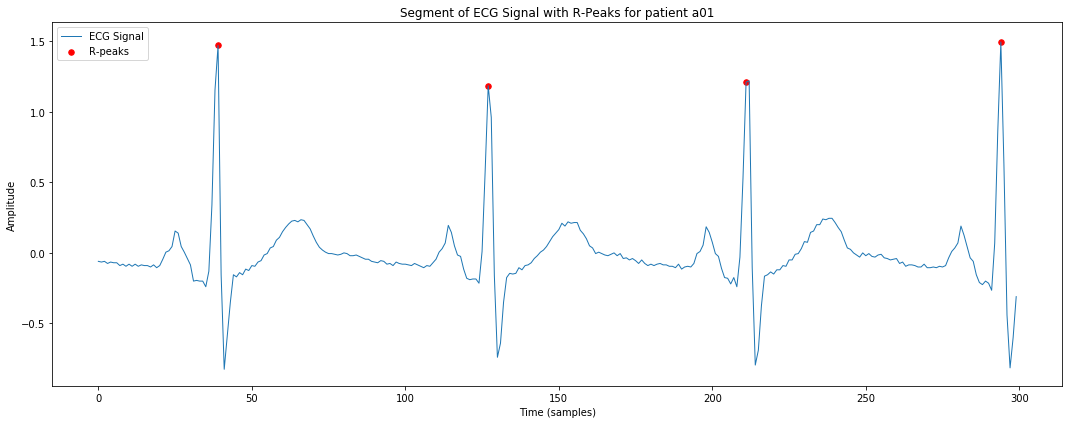

r peak 개수:  368


In [5]:
# rpeaks_data is a tuple of lists: (x, y, groups)
# x contains tuples of (rri_tm, rri_signal) and (amp_tm, amp_signal)

# 시간 위치를 샘플 인덱스로 변환하는 과정
# 예) 100Hz로 샘플링 -> 1초에 100개의 샘플 생성. 신호 시작으로부터 1초 후에 발생한 이벤트는 100번재 샘플. 
rri_data, amp_data = zip(*rpeaks_data[0])
amp_tm, amp_signal = zip(*amp_data)

# Convert time of R-peaks to indices
r_peak_indices = [int(tm * fields['fs']) for tm in amp_tm[0]]

# 시각화 범위 설정
start_index = 0
end_index = 300  # for example, show the first 2000 points

# Plotting
plt.figure(figsize=(15, 6))  # Increase figure size
plt.plot(signal[start_index:end_index], label='ECG Signal', linewidth=1)
plt.scatter([idx for idx in r_peak_indices if start_index <= idx < end_index],
            [signal[idx] for idx in r_peak_indices if start_index <= idx < end_index],
            color='red', s=30, label='R-peaks')  # Increase marker size

plt.title('Segment of ECG Signal with R-Peaks for patient a01')
plt.legend()
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print("r peak 개수: ", len(r_peak_indices))
